# Проверка гипотез по увеличению выручки в интернет-магазине

## Описание проекта

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

## Описание данных

В нашем распоряжении имеется три датасета. Файл `hypothesis.csv` хранит данные о гипотезах по увеличению выручки интернет-магазина, `orders.csv` — информацию о заказах, а `visitors.csv` — информацию о пользователях.

Данные для первой части проекта

Структура `hypothesis.csv`:  
`Hypothesis` — краткое описание гипотезы;  
`Reach` — охват пользователей по 10-балльной шкале;  
`Impact` — влияние на пользователей по 10-балльной шкале;  
`Confidence` — уверенность в гипотезе по 10-балльной шкале;  
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части проекта

Структура `orders.csv`:  
`transactionId` — идентификатор заказа;  
`visitorId` — идентификатор пользователя, совершившего заказ;  
`date` — дата, когда был совершён заказ;  
`revenue` — выручка заказа;  
`group` — группа A/B-теста, в которую попал заказ.  

Структура `visitors.csv`:  
`date` — дата;  
`group` — группа A/B-теста;  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

## План (декомпозиция) анализа данных:  
- Загрузка данных и подготовка их к анализу.
- Часть 1. Приоритизация гипотез.
    - Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
    - Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
    - Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.
- Часть 2. Анализ A/B-теста.
    - Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
    - Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
    - Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
    - Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.
    - Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.
    - Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
    - Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
    - Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
    - Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
    - Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.
    - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
    - Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
    - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
    - Примем решение по результатам теста и объясним его. Варианты решений:
        1. Остановить тест, зафиксировать победу одной из групп.
        2. Остановить тест, зафиксировать отсутствие различий между группами.
        3. Продолжить тест.
- Общий вывод.

## Загрузка данных и подготовка их к анализу.

Импортируем нужные библиотеки, загрузим данные и посмотрим на них.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
#import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

Загрузим данные о гипотезах, заказах и пользователях из CSV-файлов в переменные.

In [2]:
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),  # гипотезы
    pd.read_csv('/datasets/orders.csv'),  # заказы
    pd.read_csv('/datasets/visitors.csv'),  # пользователи
)

Посмотрим на данные о гипотезах, заказах и визитах.

In [3]:
display(hypothesis.head())
display(orders.head())
visitors.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Приведем названия столбцов к единому стилю.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

Рассмотрим общую информацию.

In [5]:
hypothesis.info()
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns)

Пропусков нет, преобразуем значения в столбцах с датой.

In [6]:
# преобразование данных о времени
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Найдем явные дубликаты.

In [7]:
display(hypothesis.duplicated().sum())
display(orders.duplicated().sum())
visitors.duplicated().sum()

0

0

0

Явные дубликаты отсутствуют. Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

In [8]:
display(hypothesis['hypothesis'].unique())
display(orders['group'].unique())
display(visitors['group'].unique())

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

array(['B', 'A'], dtype=object)

array(['A', 'B'], dtype=object)

Неявные дубликаты отсутствуют.

Проверим, не пересекаются ли пользователи в группах А и В.

In [9]:
orders_a = orders.query('group == "A"')
orders_b = orders.query('group == "B"')
orders_ab = orders_a.merge(orders_b, how='inner', on='visitor_id')
print(f"Количество заказов пользователей, которые входят одновременно в группы А и В: {orders_ab['visitor_id'].count()}, \
что составляет {round(orders_ab['visitor_id'].count()/orders['visitor_id'].count()*100, 1)}% от всех заказов.")
print(f"Количество пользователей, которые входят одновременно в группы А и В: {orders_ab['visitor_id'].nunique()}, \
что составляет {round(orders_ab['visitor_id'].nunique()/orders['visitor_id'].nunique()*100, 1)}% от всех пользователей.")

Количество заказов пользователей, которые входят одновременно в группы А и В: 183, что составляет 15.3% от всех заказов.
Количество пользователей, которые входят одновременно в группы А и В: 58, что составляет 5.6% от всех пользователей.


Удалить эти заказы (пользователей) мы не можем, потому как мы не можем удалить их из датафрейма `visits` с агрегированными данными.

__Вывод__: загрузили данные о гипотезах, заказах и визитах из CSV-файлов в переменные. Изучили данные и выполнили предобработку. Привели названия столбцов к единому стилю. Преобразовали значения в столбцах с датой на `datetime`. Пропуски и дубликаты отсутствуют в данных. Убедились, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обнаружили 5,6% пользователей, которые входят в группы А и В, но удалять их не стали в связи с невозможностью редактирования датасета `visits` с агрегированными данными.

## Часть 1. Приоритизация гипотез.

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [10]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)

hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


__Вывод__: наиболее перспективные гипотезы (ICE):
- 8. Запустить собственную службу доставки, что сократит срок доставки заказов
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [11]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


__Вывод__: наиболее перспективные гипотезы (RICE):
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

### Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

При применении фреймворка RICE на первом месте уже гипотеза под номером 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (при ICE - третье место). Так получилось, потому что ее параметр `reach` равен 10, в то время как у других гипотез он меньше.

## Часть 2. Анализ A/B-теста.

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

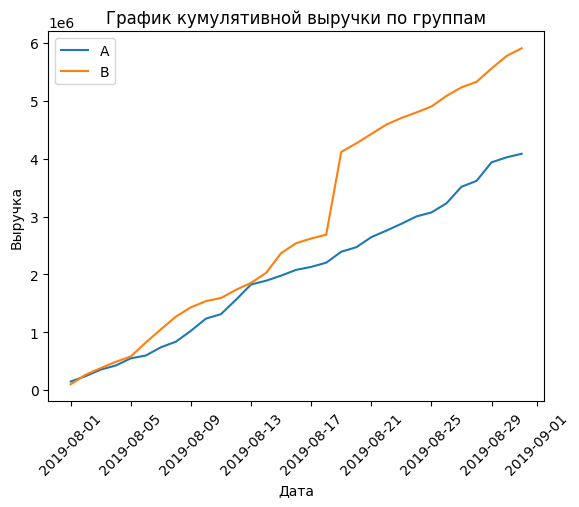

In [12]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation=45);

__Вывод:__ по графику кумулятивной выручки по группам видим, что в середине теста группа В значительно увеличилась и продолжила лидировать до окончания теста. Похоже, что аномально большие заказы влияют на результаты. При заключительном анализе их нужно удалить.

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

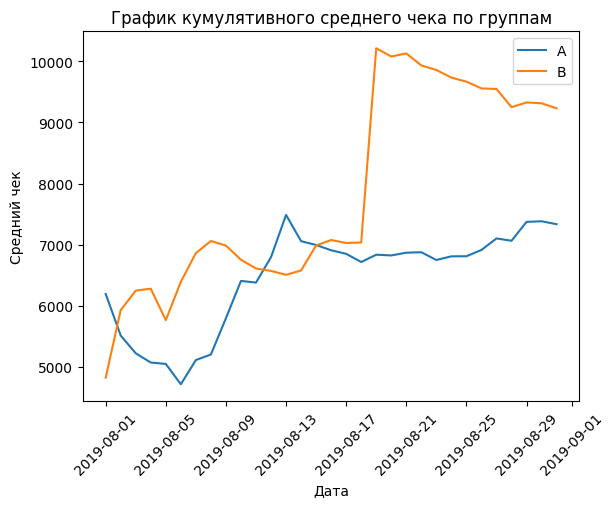

In [25]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation=45);

__Вывод:__ по графику кумулятивного среднего чека по группам видим резкое увеличение среднего чека группы В. Принимать решение по этой метрике рано. Требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

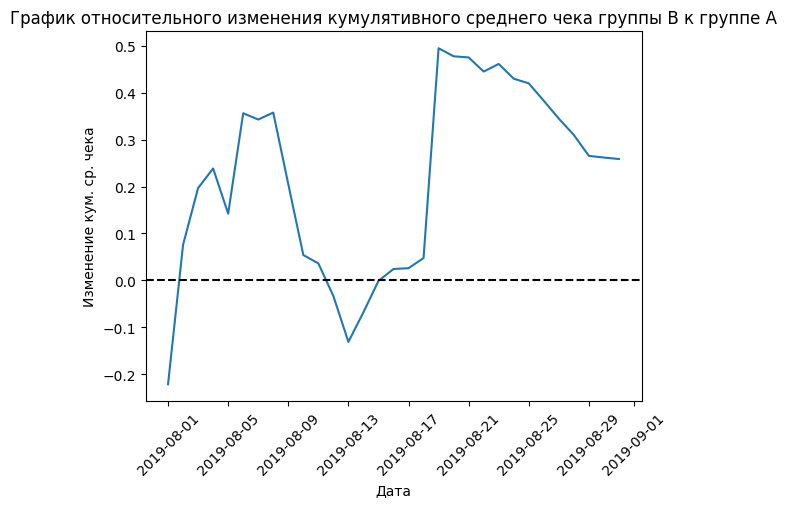

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Изменение кум. ср. чека')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45);

__Вывод:__ По графику относительного изменения кумулятивного среднего чека группы B к группе A видим, что результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

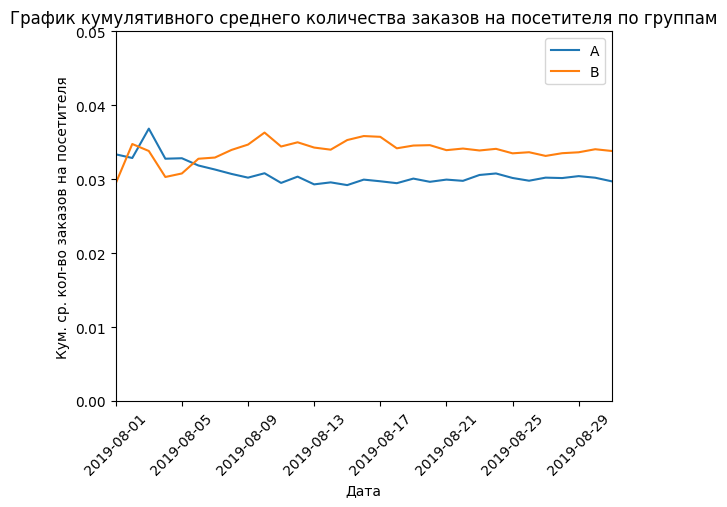

In [28]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.xlabel('Дата')
plt.ylabel('Кум. ср. кол-во заказов на посетителя')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=45);

__Вывод:__ по графику кумулятивного среднего количества заказов на посетителя по группам видим, что в начале теста группа А имела большее кумулятивное среднее количество заказов на посетителя, но постепенно группа В выровнялась и зафиксировалась больше значения группы А. 

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

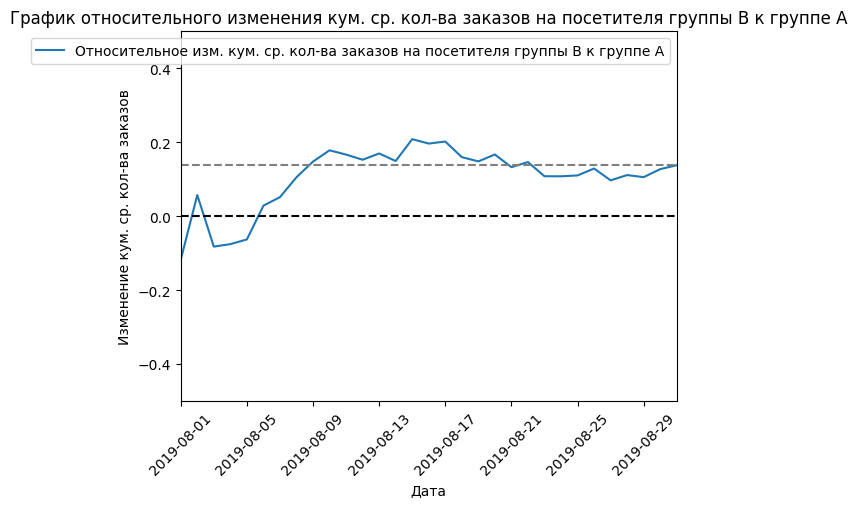

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительное изм. кум. ср. кол-ва заказов на посетителя группы B к группе A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.xlabel('Дата')
plt.ylabel('Изменение кум. ср. кол-ва заказов')
plt.title('График относительного изменения кум. ср. кол-ва заказов на посетителя группы B к группе A')
plt.xticks(rotation=45);

__Вывод:__ по графику относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A видим, что почти с самого начала теста группа В лидирует по относительному изменению кумулятивного среднего количества заказов на посетителя, к концу теста на 14%.

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

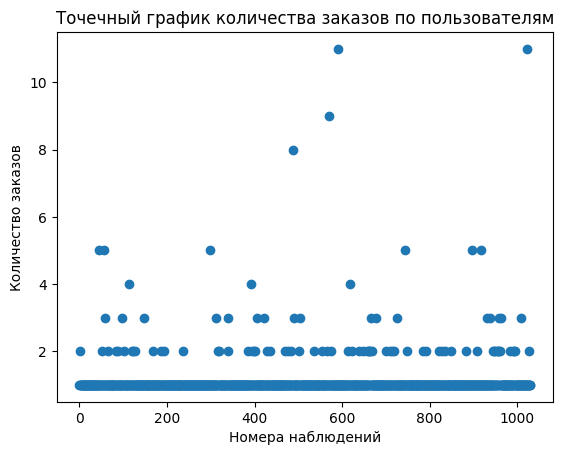

In [30]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Номера наблюдений')
plt.ylabel('Количество заказов')
plt.title('Точечный график количества заказов по пользователям');

__Вывод:__ по графику количества заказов по пользователям видим, что пользователей, заказавших более двух раз, немного. Они вполне могут быть аномальными, чтобы определить это посчитаем выборочные перцентили.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [18]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


__Вывод:__ не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей - больше четырех заказов. Выберем границу для определения аномальных пользователей в 5%.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

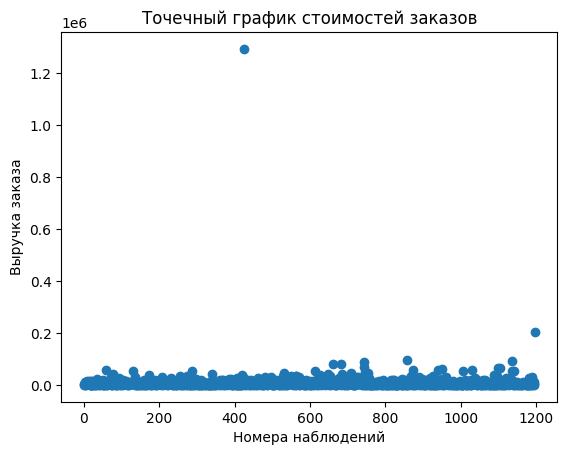

In [31]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.xlabel('Номера наблюдений')
plt.ylabel('Выручка заказа')
plt.title('Точечный график стоимостей заказов');

__Вывод:__ по точечному графику стоимостей заказов видим два выброса: в районе 200 000 рублей и свыше 1 200 000 рублей. Видимо, именно этот заказ резко увеличил среднюю стоимость заказа группы В.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [20]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


__Вывод:__ не более, чем у 5% заказов стоимость выше 28 000 рублей. И не более, чем у 1% заказов - выше 58 233 рублей. Выберем границу для определения аномальных заказов в 5%.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

Сформулируем нулевую и альтернативную гипотезы.
- Нулевая гипотеза (H0): в среднем количестве заказов на посетителя между группами А и В по «сырым» данным статистически значимых различий нет.
- Альтернативная гипотеза (H1): в среднем количестве заказов на посетителя между группами А и В по «сырым» данным статистически значимые различия есть.

Зададим уровень статистической значимости: 0,05.

In [21]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value для сравнения среднего между группами: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительное различие в среднем между группами: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value для сравнения среднего между группами: 0.017
Относительное различие в среднем между группами: 0.138


__Вывод:__ p-value меньше 0,05, поэтому нулевую гипотезу отвергаем. Анализ "сырых" данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 13,8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Сформулируем нулевую и альтернативную гипотезы.
- Нулевая гипотеза (H0): в среднем чеке заказа между группами А и В по «сырым» данным статистически значимых различий нет.
- Альтернативная гипотеза (H1): в среднем чеке заказа между группами А и В по «сырым» данным статистически значимые различия есть.

Зададим уровень статистической значимости: 0,05.

In [22]:
print('P-value для сравнения средних чеков между группами: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value для сравнения средних чеков между группами: 0.729
Относительный прирост среднего чека группы B: 0.259


__Вывод:__ p-value больше 0,05 - статистически значимых отличий в среднем чеке между группами нет. Но при этом относительное различие среднего чека между группами 25,9%, что, скорее всего, из-за аномалий.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

~Мы приняли за аномальных пользователей тех, кто совершил 3 заказа и более, или совершил заказ на сумму свыше 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% заказов с наибольшей стоимостью.~

Отсечем аномальных пользователей с наибольшим числом заказов и аномальные заказы с наибольшей стоимостью по 95 перцентилю.

Сформулируем нулевую и альтернативную гипотезы.
- Нулевая гипотеза (H0): в среднем количестве заказов на посетителя между группами по «очищенным» данным статистически значимых различий нет.
- Альтернативная гипотеза (H1): в среднем количестве заказов на посетителя между группами по «очищенным» данным статистически значимые различия есть.

Зададим уровень статистической значимости: 0,05.

In [23]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value для сравнения среднего между "очищенными" группами: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего "очищенной" группы B: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value для сравнения среднего между "очищенными" группами: 0.013
Относительный прирост среднего "очищенной" группы B: 0.173


__Вывод:__ как и в случае с "сырыми" данными статистическая значимость различий в среднем количестве заказов на посетителя между группами по "очищенным" данным достигнута. ~Группа В значительно лучше группы А. Относительный прирост среднего "очищенной" группы B: 17,3%.~ После фильтрации данных конверсия в группе В выросла до 17,3%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Сформулируем нулевую и альтернативную гипотезы.
- Нулевая гипотеза (H0): в среднем чеке заказа между группами по «очищенным» данным статистически значимых различий нет.
- Альтернативная гипотеза (H1): в среднем чеке заказа между группами по «очищенным» данным статистически значимые различия есть.

Зададим уровень статистической значимости: 0,05.

In [24]:
print(
    'P-value для сравнения средних чеков между "очищенными" группами: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный прирост среднего чека "очищенной" группы B: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value для сравнения средних чеков между "очищенными" группами: 0.738
Относительный прирост среднего чека "очищенной" группы B: -0.020


__Вывод:__ статистически значимых различий в среднем чеке между "очищенными" группами не появилось. Но при этом относительное различие среднего чека между группами уменьшилось до -2%, что подтверждает наличие аномалий.

### Примем решение по результатам теста и объясним его.

Результаты теста:
- Есть статистически значимое различие в среднем количестве заказов на посетителя между группами как по "сырым" данным, так и после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами как по "сырым" данным, так и по "очищенным" данным. Однако после удаления аномалий изменился относительный присрост среднего чека очищенной группы В: -2%.
- График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A сообщает, что результаты группы В лучше группы А: имеют тенденцию к росту, либо зафиксировались около среднего значения.

Примем решение остановить тест, признать его успешным и зафиксировать победу группы В в связи с увеличением среднего количества заказов на посетителя.

Рекомендации для отдела маркетинга:

- Цель по увеличению количества заказов на посетителя достигнута, при этом следует сконцетрировать усилия по стимулированию пользователей на увеличение среднего чека заказа. Например, при оформлении заказа подсказывать пользователю, что при достижении требуемой суммы заказа он получит бесплатную доставку или подарок.
- При проведении А/В-тестирования не допускать, чтобы пользователь мог войти в обе группы тестирования или не агрегировать данные, чтобы таких пользователей можно было удалить из анализа.

## Общий вывод.

Провели А/В-теста для увеличения выручки крупного интернет-магазина.

Загрузка данных и подготовка их к анализу:
- Загрузили данные о гипотезах, заказах и визитах из CSV-файлов в переменные.  
- Изучили данные и выполнили предобработку.  
- Привели названия столбцов к единому стилю.  
- Преобразовали значения в столбцах с датой на `datetime`. Пропуски и дубликаты отсутствуют в данных. Убедились, что типы данных во всех колонках соответствуют сохранённым в них значениям.  
- Обнаружили 5,6% пользователей, которые входят в группы А и В, но удалять их не стали в связи с невозможностью редактирования датасета `visits` с агрегированными данными.

Часть 1. Приоритизация гипотез:
- Приоритизировали гипотезы по фреймворку ICE:
    1. Запустить собственную службу доставки, что сократит срок доставки заказов.
    2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
    3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
- Приоритизировали гипотезы по фреймворку RICE:
    1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
    2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
    3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
- Указали, как изменилась приоритизация гипотез при применении RICE вместо ICE:  
    - При применении фреймворка RICE на первом месте уже гипотеза: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (при ICE - третье место). Так получилось, потому что ее параметр `reach` равен 10, в то время как у других гипотез он меньше.
    
Часть 2. Анализ A/B-теста:
- По графику кумулятивной выручки по группам увидели, что в середине теста группа В значительно увеличилась и продолжила лидировать до окончания теста. Похоже, что аномально большие заказы влияют на результаты.
- По графику кумулятивного среднего чека по группам увидели резкое увеличение среднего чека группы В. Требуется дополнительный анализ выбросов, которые так сильно искажают результаты.  
- По графику относительного изменения кумулятивного среднего чека группы B к группе A увидели, что результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.
- По графику кумулятивного среднего количества заказов на посетителя по группам увидели, что в начале теста группа А имела большее кумулятивное среднее количество заказов на посетителя, но постепенно группа В выровнялась и зафиксировалась больше значения группы А.
- По графику относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A увидели, что почти с самого начала теста группа В лидирует по относительному изменению кумулятивного среднего количества заказов на посетителя, к концу теста на 14%.
- По графику количества заказов по пользователям увидели, что пользователей, заказавших более двух раз, немного. Они вполне могут быть аномальными.
- Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей - больше четырех заказов. Выбрали границу для определения аномальных пользователей в 5%.
- По точечному графику стоимостей заказов увидели два выброса: в районе 200 000 рублей и свыше 1 200 000 рублей. Видимо, именно этот заказ резко увеличил среднюю стоимость заказа группы В.
- Не более, чем у 5% заказов стоимость выше 28 000 рублей. И не более, чем у 1% заказов - выше 58 233 рублей. Выбрали границу для определения аномальных заказов в 5%.
- Анализ "сырых" данных показал, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 13,8%.
- Как и в случае с "сырыми" данными статистическая значимость различий в среднем количестве заказов на посетителя между группами по "очищенным" данным достигнута. Группа В значительно лучше группы А. Относительный прирост среднего "очищенной" группы B: 17,3%.
- Статистически значимых различий в среднем чеке между "очищенными" группами не появилось. Но при этом относительное различие среднего чека между группами уменьшилось до -2%, что подтверждает наличие аномалий.

Результаты теста:

1. Есть статистически значимое различие в среднем количестве заказов на посетителя между группами как по "сырым" данным, так и после фильтрации аномалий.
2. Нет статистически значимого различия по среднему чеку между группами как по "сырым" данным, так и по "очищенным" данным. Однако после удаления аномалий изменился относительный присрост среднего чека очищенной группы В: -2%.
3. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A сообщает, что результаты группы В лучше группы А: имеют тенденцию к росту, либо зафиксировались около среднего значения.

Приняли решение остановить тест, признать его успешным и зафиксировать победу группы В в связи с увеличением среднего количества заказов на посетителя.

Рекомендации для отдела маркетинга:

- Цель по увеличению количества заказов на посетителя достигнута, при этом следует сконцетрировать усилия по стимулированию пользователей на увеличение среднего чека заказа. Например, при оформлении заказа подсказывать пользователю, что при достижении требуемой суммы заказа он получит бесплатную доставку или подарок.
- При проведении А/В-тестирования не допускать, чтобы пользователь мог войти в обе группы тестирования или не агрегировать данные, чтобы таких пользователей можно было удалить из анализа.